Найти на площадке область, из которой игроп попадает на площадку соперника при заданных параметрах

In [467]:
import numpy as np
from scipy.constants import g
import matplotlib.pyplot as plt
import matplotlib

In [468]:
%matplotlib notebook

Заданные параметры:

In [469]:
player_growth=1.8 # рост игрока
alpha=np.radians(45) # угол броска к горизонту
betta=np.pi/2 # угол броска относительно сетки
speed=10 # скорость подачи мяча
volleyball_net=2.43 #высота волейбольной сетки
length_court=9 # длина площадки
width_court=9 # ширина площадки
g=9.806 # ускорение свободного падения

x0=9
y0=-9

Вычислим время, за которое мяч достигнет сетки:

In [470]:
net_time=-y0/speed/np.cos(alpha)/np.sin(betta)
net_time

1.2727922061357855

Вычислим положеие мяча во время пролёта через сетку:

In [471]:
z=speed*np.sin(alpha)*net_time+player_growth-g*net_time**2/2
z

2.857140000000002

Вычислим время падения мяча на поле соперника:

In [472]:
D=np.square(speed)/np.square(g)*np.sin(alpha)*np.sin(alpha)+2*player_growth/g
fall_time=speed/g*np.sin(alpha)*np.sin(alpha)+np.sqrt(D)

Вычислим координаты падения мяча на стороне противнка при ращличных betta 
и заданных V, x0, y0, рост игрока, угол к горизонту:

In [473]:
y=[]
x=[]
betta =0;
while betta < np.pi:
    x_ball_fell=speed*np.cos(alpha)*np.cos(betta)*fall_time+x0
    y_ball_fell=speed*np.cos(alpha)*np.sin(betta)*fall_time+y0
    z=speed*np.sin(alpha)*net_time+player_growth-g*net_time**2/2
    if (0<=x_ball_fell<=width_court and 0<=y_ball_fell<=length_court and z>volleyball_net):
        x.append(x_ball_fell)
        y.append(y_ball_fell)
    betta+=np.pi/1000

Начертим область падения мяча на стороне противника при заданных параметрах, 
меняя угол между плоскостью падачи и сеткой

<IPython.core.display.Javascript object>


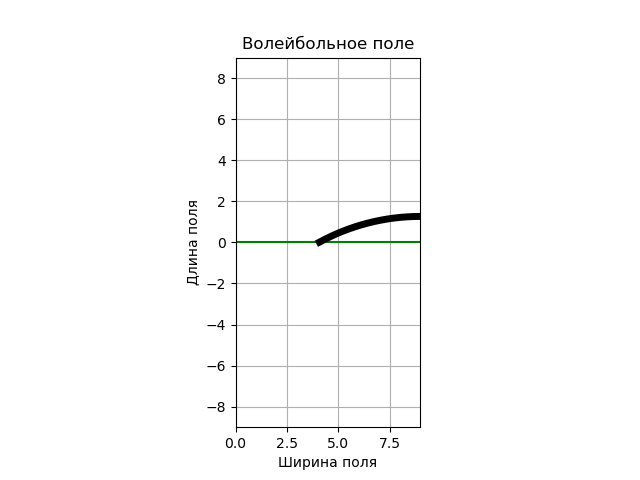

In [474]:
plt.figure()
plt.title('Волейбольное поле')
plt.xlabel('Ширина поля')
plt.ylabel('Длина поля')
plt.xlim([0, width_court])
plt.ylim([-length_court, length_court])
plt.grid()
ax = plt.gca()    
ax.axhline(y=0, color='g')
ax.set_aspect('equal', adjustable='box')
plt.plot(x, y, color = 'black', linewidth = 5)
plt.draw()


Решим обратную задачу:
    
Найдём обслать из которой надо подавать мячь с заданными параметрами, для того. чтобы мяч попал в поле игрока,
меняя угол между плоскостью падачи и сеткой

In [475]:
x0=[]
y0=[]
betta=0
for x_p in range(0, width_court):
    for y_p in range(0, length_court):
        while betta < np.pi:
            x_0=x_p-speed*np.cos(alpha)*np.cos(betta)*fall_time
            y_0=y_p-speed*np.cos(alpha)*np.sin(betta)*fall_time
            z=speed*np.sin(alpha)*net_time+player_growth-g*net_time**2/2
           # if 0<=x_0<=width_court and -length_court<=y_0<=0:
            x0.append(x_0)
            y0.append(y_0)
            betta+=np.pi/1000      

Начертим результаты:

<IPython.core.display.Javascript object>


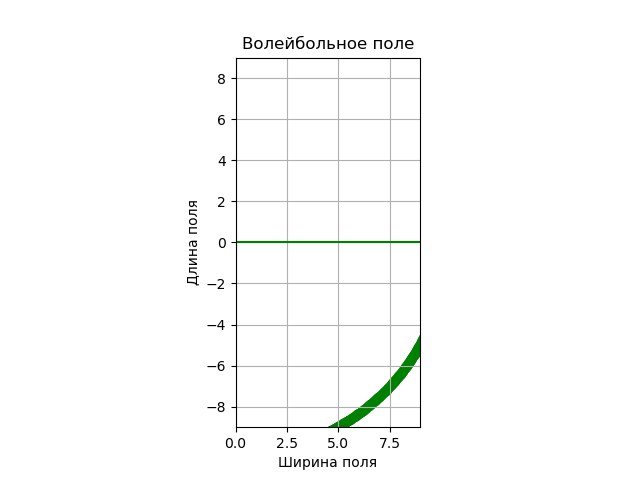

In [476]:
plt.figure()
plt.title('Волейбольное поле')
plt.xlabel('Ширина поля')
plt.ylabel('Длина поля')
plt.xlim([0, width_court])
plt.ylim([-length_court, length_court])
plt.grid()
ax = plt.gca()    
ax.axhline(y=0, color='g')
ax.set_aspect('equal', adjustable='box')
plt.scatter(x0, y0, c='g', label='Multiple Points')
plt.draw()


Выводы: для того, чтобы попасть в поле игрока с заданными параметрами, необходимо находиться в зелёной полосе